<a href="https://colab.research.google.com/github/rithvik2607/TwitterSentimentAnalysis/blob/master/twitterSentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Description: Sentiment analysis of tweets using python

In [0]:
# Import the libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [0]:
# Twitter API credentials
Consumer_Key = "MyCSYRFe9W9nZXuVnXbqXhcAy"
Consumer_Secret_Key = "o8vGHwq8c4BUnT8YqvkDgcnOQ1sjqa4W8fmhq4sbP70oZSictn"
Access_Token = "1133988667511336961-iSoIgnXKMulPuP3zSg9YeQXd7jch9d"
Access_Token_Secret = "RPsrCRpJG0fQEAmKnKkhaka4Yes8l2rsi4O359ltz3ogz"

In [0]:
# Create the authentication object
authenticate = tweepy.OAuthHandler(Consumer_Key, Consumer_Secret_Key)

# Set access token and access token secret
authenticate.set_access_token(Access_Token, Access_Token_Secret)

# Create API and pass in auth information
api = tweepy.API(authenticate, wait_on_rate_limit= True)

In [5]:
# Extract 100 tweets from a user
posts = api.user_timeline(screen_name = "BillGates", count=100, lang="en", tweet_mode="extended")

# Print 5 tweets from the account
print("The last 5 tweets from this account are : \n")
i=1
for tweet in posts[0:5]:
  print(str(i) + ') ' + tweet.full_text + "\n")
  i+=1

The last 5 tweets from this account are : 

1) We don't yet have all the tools we need to stop the novel coronavirus and safely re-open the economy. But they are on the horizon. https://t.co/1q7YHRXokz

2) This is a great introduction to computer science concepts for students at all levels. I’m looking forward to joining today’s Code Break. https://t.co/Nzoaz4yAAe

3) Halting funding for the World Health Organization during a world health crisis is as dangerous as it sounds. Their work is slowing the spread of COVID-19 and if that work is stopped no other organization can replace them. The world needs @WHO now more than ever.

4) .@NickKristof does an amazing job capturing the heroism of the health care workers on the front lines of the coronavirus fight. https://t.co/x1TgE2oNXE

5) On #WorldHealthDay — and every day — I want to thank all of the health heroes for their sacrifices and for keeping us safe. https://t.co/0x9QFSrlQb



In [6]:
#Store the tweets in a dataframe
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['tweets'])

#Display 5 tweets
df.head()

,tweets
0,We don't yet have all the tools we need to sto...
1,This is a great introduction to computer scien...
2,Halting funding for the World Health Organizat...
3,.@NickKristof does an amazing job capturing th...
4,On #WorldHealthDay — and every day — I want to...


In [7]:
#Clean the text

#Create a function to clean the tweets
def cleanTxt(text):
  text = re.sub('@[A-Za-z0-9]+','',text) #Removed @mentions
  text = re.sub('#','',text) #Removed '#'
  text = re.sub('RT[\s]+','',text) #Removed RTs
  text = re.sub('https?:\/\/\s+','',text) #Removed links

  return text

#Pass tweets through the function
df['tweets']=df['tweets'].apply(cleanTxt)

#Show cleaned text
df

,tweets
0,We don't yet have all the tools we need to sto...
1,This is a great introduction to computer scien...
2,Halting funding for the World Health Organizat...
3,. does an amazing job capturing the heroism of...
4,On WorldHealthDay — and every day — I want to ...
...,...
95,Even a single child paralyzed by polio is one ...
96,"In Abu Dhabi this week, the world committed $2..."
97,.'s leadership has been a catalyst to India's...
98,The more I’ve learned about Alzheimer’s diseas...


In [8]:
#Function to find out the subjectivity of the text
def getSubjectivity(text):
  return(TextBlob(text).sentiment.subjectivity)

#Function to find out the polarity of the text
def getPolarity(text):
  return(TextBlob(text).sentiment.polarity)

#Apply the functions to get subjectivity and polarity for the tweets
df['subjectivity']=df['tweets'].apply(getSubjectivity)
df['polarity']=df['tweets'].apply(getPolarity)

#Show the polarity and subjectivity
df

,tweets,subjectivity,polarity
0,We don't yet have all the tools we need to sto...,0.500000,0.500000
1,This is a great introduction to computer scien...,0.750000,0.800000
2,Halting funding for the World Health Organizat...,0.591667,-0.012500
3,. does an amazing job capturing the heroism of...,0.900000,0.600000
4,On WorldHealthDay — and every day — I want to ...,0.500000,0.500000
...,...,...,...
95,Even a single child paralyzed by polio is one ...,0.304762,0.209524
96,"In Abu Dhabi this week, the world committed $2...",1.000000,-1.000000
97,.'s leadership has been a catalyst to India's...,0.500000,0.500000
98,The more I’ve learned about Alzheimer’s diseas...,0.500000,0.500000


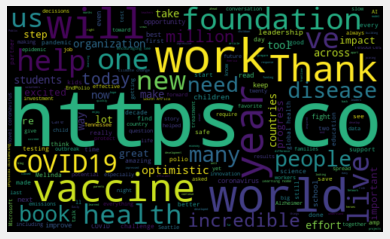

In [9]:
#Plot the word cloud
allWords = ' '.join([twts for twts in df['tweets']])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()

In [12]:
# Create a function to classify the text as positive, negative or neutral
def getAnalysis(score):
  if score<0:
    return 'Negative'
  elif score==0:
    return 'Neutral'
  else:
    return 'Positive'

#Apply the function on all the tweets
df['analysis'] = df['polarity'].apply(getAnalysis)

#Print the dataframe
df

,tweets,subjectivity,polarity,analysis
0,We don't yet have all the tools we need to sto...,0.500000,0.500000,Positive
1,This is a great introduction to computer scien...,0.750000,0.800000,Positive
2,Halting funding for the World Health Organizat...,0.591667,-0.012500,Negative
3,. does an amazing job capturing the heroism of...,0.900000,0.600000,Positive
4,On WorldHealthDay — and every day — I want to ...,0.500000,0.500000,Positive
...,...,...,...,...
95,Even a single child paralyzed by polio is one ...,0.304762,0.209524,Positive
96,"In Abu Dhabi this week, the world committed $2...",1.000000,-1.000000,Negative
97,.'s leadership has been a catalyst to India's...,0.500000,0.500000,Positive
98,The more I’ve learned about Alzheimer’s diseas...,0.500000,0.500000,Positive


In [13]:
#Print all the positive tweets
j=1
sortedDF=df.sort_values(by=['polarity'])
for i in range(0,sortedDF.shape[0]):
  if sortedDF['analysis'][i]=='Positive':
    print(str(j)+') '+sortedDF['tweets'][i])
    print()
    j+=1

1) We don't yet have all the tools we need to stop the novel coronavirus and safely re-open the economy. But they are on the horizon. https://t.co/1q7YHRXokz

2) This is a great introduction to computer science concepts for students at all levels. I’m looking forward to joining today’s Code Break. https://t.co/Nzoaz4yAAe

3) . does an amazing job capturing the heroism of the health care workers on the front lines of the coronavirus fight. https://t.co/x1TgE2oNXE

4) On WorldHealthDay — and every day — I want to thank all of the health heroes for their sacrifices and for keeping us safe. https://t.co/0x9QFSrlQb

5) It’s encouraging to see the first projects begin from our effort to accelerate safe and effective drugs for COVID19. https://t.co/UH66MrAYcV

6) I’m excited to join the  Daily Homeroom today to talk about the incredible ways parents, teachers, and students are coming together to keep learning while schools are closed. https://t.co/faMTkwl97g

7) If we make the right decisions

In [14]:
#Print the negative tweets
j=1
sortedDF=df.sort_values(by=['polarity'], ascending='False')
for i in range(0,sortedDF.shape[0]):
  if sortedDF['analysis'][i]=='Negative':
    print(str(j)+') '+sortedDF['tweets'][i])
    print()
    j+=1

1) Halting funding for the World Health Organization during a world health crisis is as dangerous as it sounds. Their work is slowing the spread of COVID-19 and if that work is stopped no other organization can replace them. The world needs  now more than ever.

2) I always enjoy chatting with , even though we had to sit a little bit further apart than usual this time. https://t.co/aqwtN1tS2p

3) Extreme physical distancing measures will make a big difference in the U.S., but we need a consistent nationwide approach. Until the case numbers start to go down across America—which could take 10 weeks or more—no one can continue business as usual or relax the shutdown.

4) Science is giving us the opportunity to improve lives around the world faster than ever before. Today I was honored to give a speech on this subject at the  annual meeting. AAASmtg https://t.co/03yWD4svD6

5) : The world must work together to slow the coronavirus outbreak, protect the most vulnerable, &amp; develop tools 

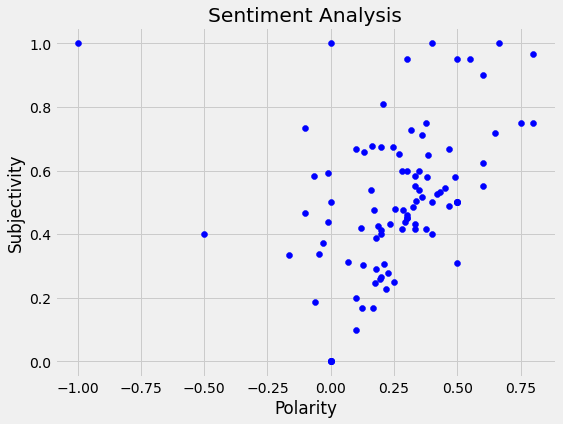

In [16]:
#Plot a graph between polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['polarity'][i],df['subjectivity'][i], color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [18]:
#Find the percentage of positive tweets
ptweets=df[df.analysis=='Positive']
ptweets=ptweets['tweets']

round( (ptweets.shape[0]/df.shape[0])*100 , 1)

80.0

In [19]:
#Find the percentage of negative tweets
ntweets=df[df.analysis=='Negative']
ntweets=ntweets['tweets']

round( (ntweets.shape[0]/df.shape[0])*100, 1)

11.0

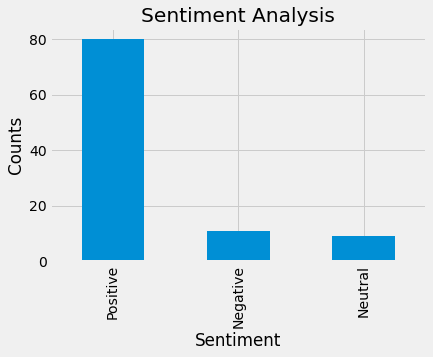

In [20]:
#Show the value counts
df['analysis'].value_counts()

#Plot the value counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['analysis'].value_counts().plot(kind='bar')
plt.show()